# IBM HR EMPLOYEE ATTRITION 


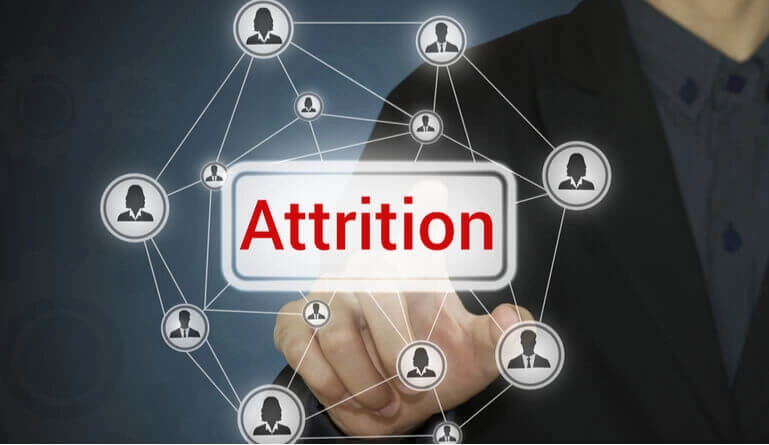

In [1]:
!pip install xgboost

In [2]:
#IMPORTING NEEDED LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('/Users/vikram/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

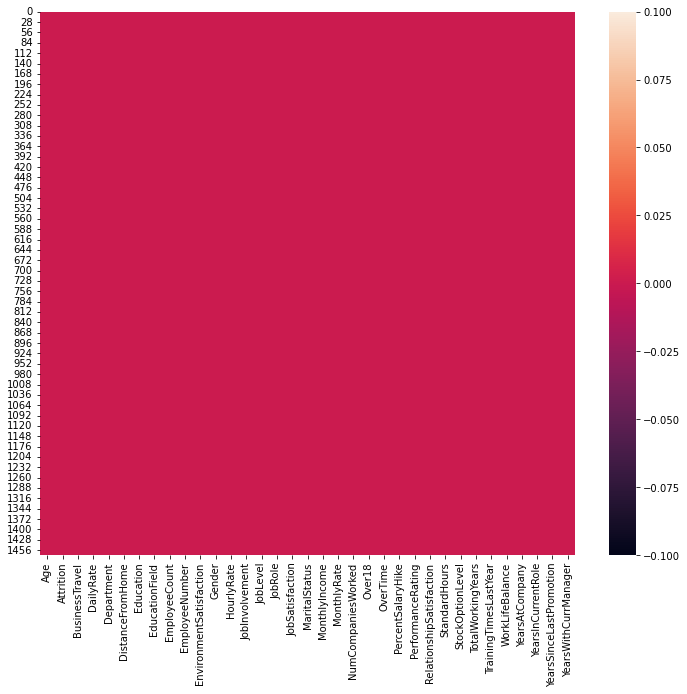

In [7]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())

#### no null values

# EDA  (EXPLORATORY DATA ANALYSIS)

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


std is bit higher in some columns such as hourly rate,employee number

right skewness present in some columns such as YearsAtCompany,YearsInCurrentRole,etc

<AxesSubplot:>

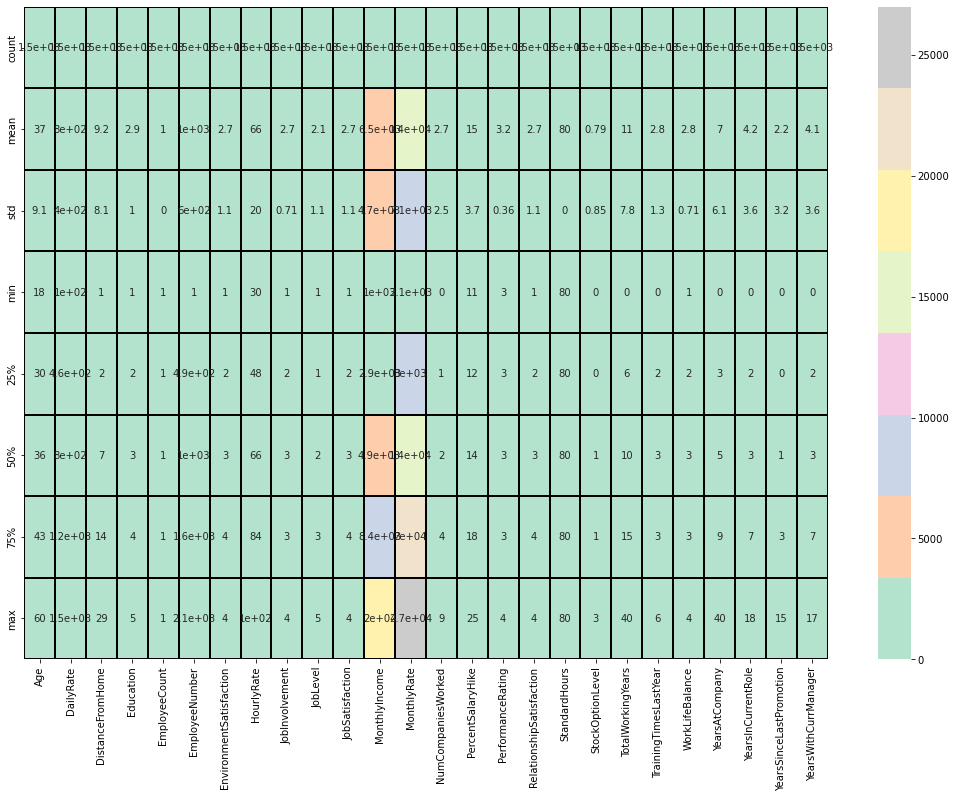

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.describe(),annot=True,linecolor='black',linewidths=0.2,cmap='Pastel2')

In [10]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

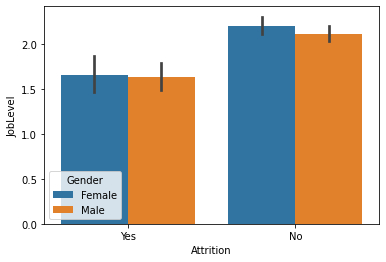

In [11]:
sns.barplot(data=df,x='Attrition',y='JobLevel',hue='Gender')

Male are more in numbers than female and are almost at a same level in both the attrition cases

In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

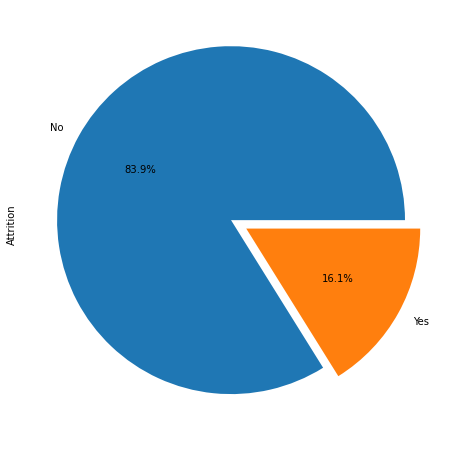

In [13]:
plt.figure(figsize=(10,8))
df.Attrition.value_counts().plot.pie(explode=[0.05,0.05],autopct='%1.1f%%',shadow=False);

**TARGET COLUMN IS CONTAINING UNBALANCED DATA**

##### 83.9% VALUE HAS NO ATTRITON 

##### 16.1% HAS YES ATTRITION

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

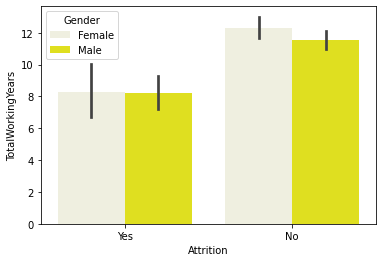

In [14]:
sns.barplot(data=df,x='Attrition',y='TotalWorkingYears',hue='Gender',color='yellow')

TOTAL WORKING HOURS ARE SAME FOR BOTH MALE AND FEMALE WHICH IS GOOD FOR THE OFFICE ENVIRONMENT IN YES ATTRITION

<AxesSubplot:xlabel='Attrition', ylabel='Education'>

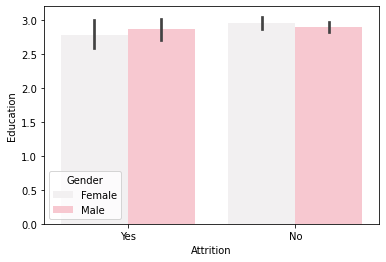

In [15]:
sns.barplot(data=df,x='Attrition',y='Education',hue='Gender',color='pink')

EDUCATION FOR BOTH YES NO ATTRITION ARE SAME ,HENCE EDUCATION IS NOT THE REASON FOR ATTRITION


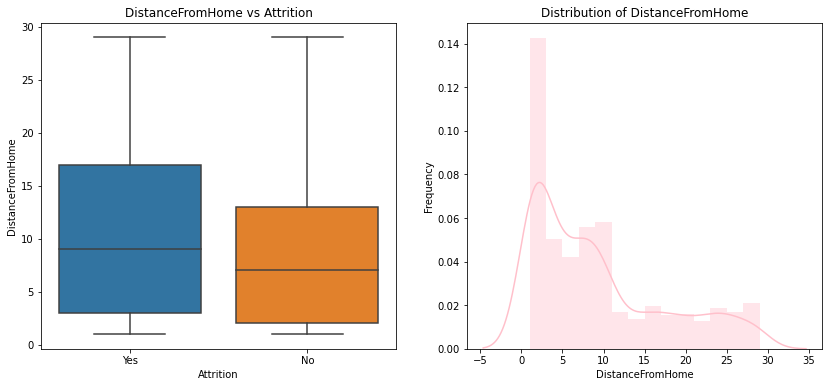

In [16]:
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
    #boxplot for comparison
    sns.boxplot(x = 'Attrition', y = 'DistanceFromHome', data=df, ax=ax[0])
    ax[0].set_title("DistanceFromHome vs Attrition")
    
    #distribution plot
    ax[1].set_title("Distribution of DistanceFromHome")
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df['DistanceFromHome'], ax=ax[1], kde=True,color='pink')
    
    plt.show()

DistanceFromHome have some skewnesss present and hence is more likely to be the reason for yes attrition

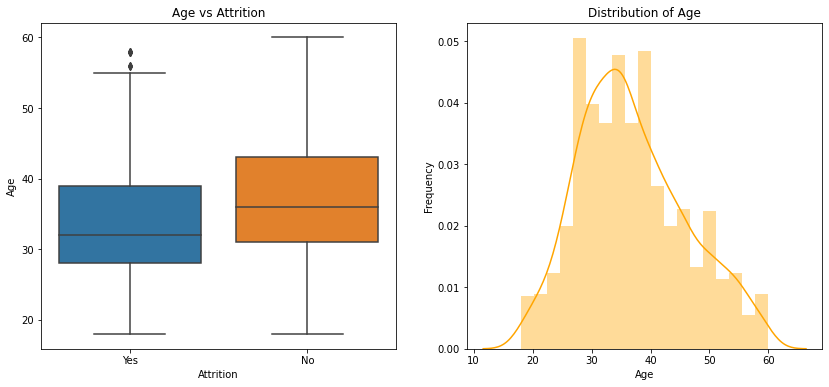

In [17]:
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
    #boxplot for comparison
    sns.boxplot(x = 'Attrition', y = 'Age', data=df, ax=ax[0])
    ax[0].set_title("Age vs Attrition")
    
    #distribution plot
    ax[1].set_title("Distribution of Age")
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df['Age'], ax=ax[1], kde=True,color='orange')
    
    plt.show()

age is normally distributed AND young age tend to change job than older ones

age has some outliers present in data

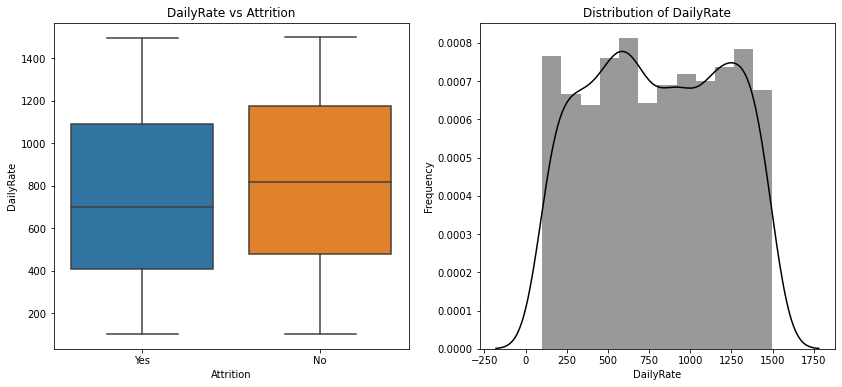

In [18]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
#boxplot for comparison
sns.boxplot(x = 'Attrition', y = 'DailyRate', data=df, ax=ax[0])
ax[0].set_title("DailyRate vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of DailyRate")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['DailyRate'], ax=ax[1], kde=True,color='black')
    
plt.show()

daily rate does not have much impact on attrition

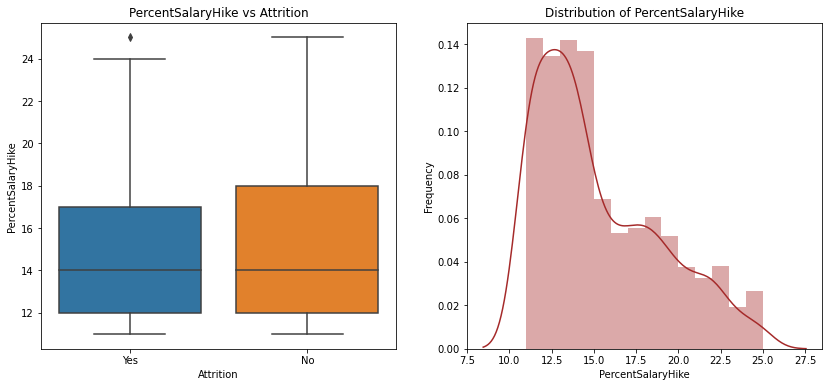

In [19]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
#boxplot for comparison
sns.boxplot(x = 'Attrition', y = 'PercentSalaryHike', data=df, ax=ax[0])
ax[0].set_title("PercentSalaryHike vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of PercentSalaryHike")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['PercentSalaryHike'], ax=ax[1], kde=True,color='brown')
    
plt.show()

PercentSalaryHike is skewed toward right 
salary hike also have some role in attrition

it also has outliers 

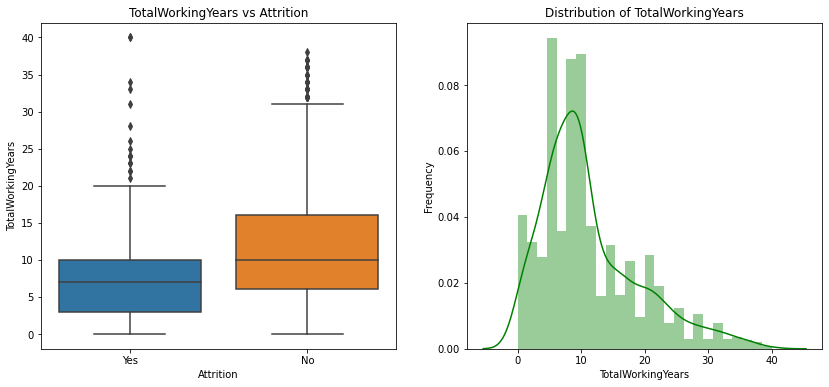

In [20]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   
#boxplot for comparison
sns.boxplot(x = 'Attrition', y = 'TotalWorkingYears', data=df, ax=ax[0])
ax[0].set_title("TotalWorkingYears vs Attrition")
    
#distribution plot
ax[1].set_title("Distribution of TotalWorkingYears")
ax[1].set_ylabel("Frequency")
sns.distplot(a = df['TotalWorkingYears'], ax=ax[1], kde=True,color='green')
    
plt.show()

OUTLIERS PRESENT IN TOTAL WORKING YEARS DATA AND ALSO IT IS SKEWED POSITIVELY.

TOTALWORKINGYEARS IS ALSO THE REASON FOR ATTRTION AS THE CLIENT PREFER TO TAKE TO TALK/WORK WITH FAMILIAR EMPLOYEES,SO 
SOME STAY SOME LEAVE.


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='PerformanceRating'>

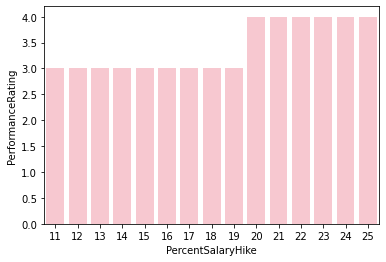

In [21]:
sns.barplot(data=df,x='PercentSalaryHike',y='PerformanceRating',color='pink')

HIGHER THE PerformanceRating HIGH WOULD BE PERCENTAGE HIKE AND DAILY RATE

<AxesSubplot:xlabel='YearsAtCompany', ylabel='JobLevel'>

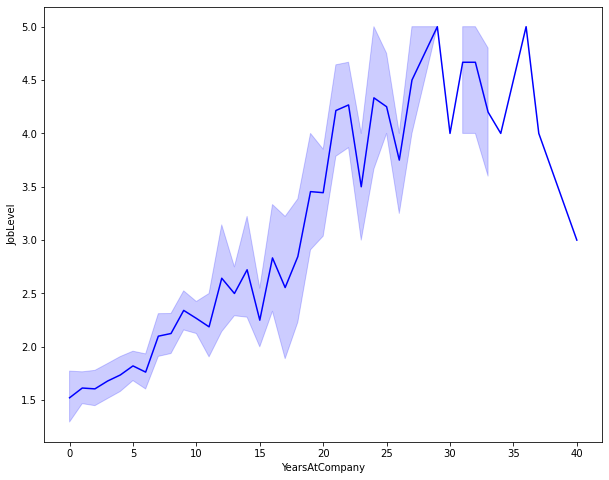

In [22]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='YearsAtCompany',y='JobLevel',color='blue')

AS YEARS AT CO. RAISES JOB LEVEL ALSO INCREASES

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Attrition'>

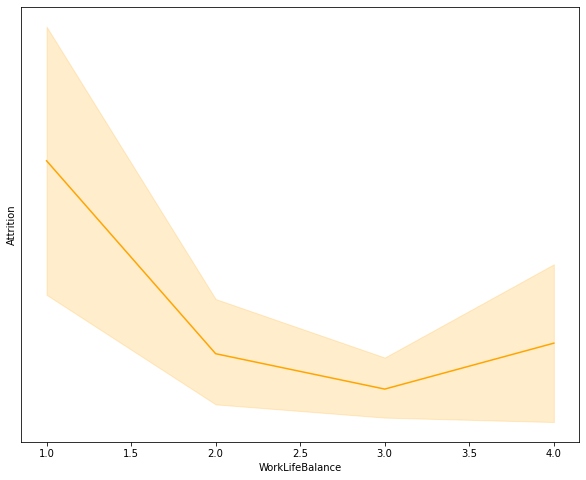

In [23]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='WorkLifeBalance',y='Attrition',color='orange')

MAINTAINING WorkLifeBalance HELP IN KEEPING THE EMPLOYEE STAY AND ALSO COMPANY LIKES THOSE EMPLOYEE TOO,SOO WONT FIRE THEM 

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

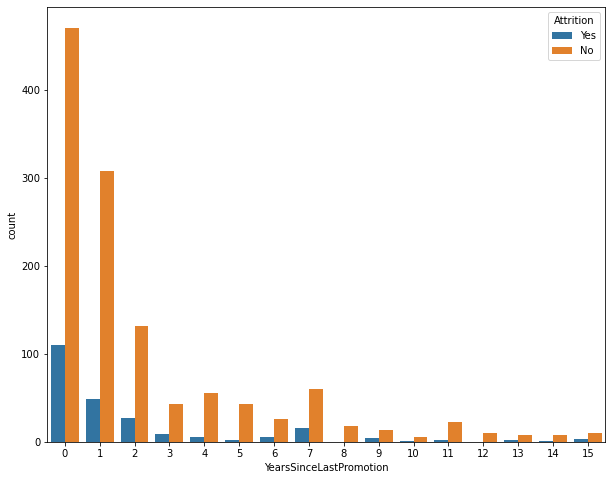

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='YearsSinceLastPromotion',hue='Attrition')

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

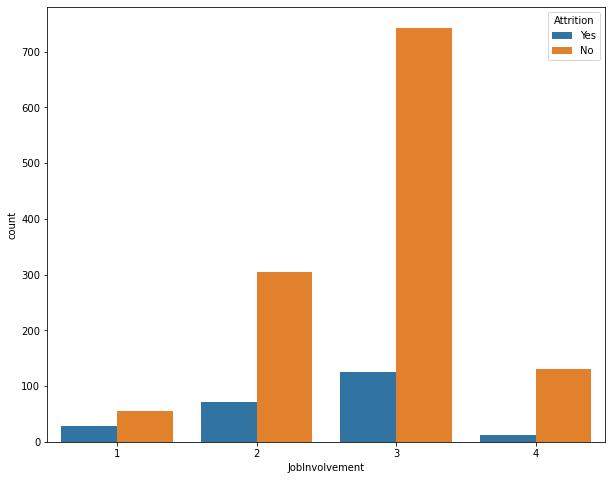

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='JobInvolvement',hue='Attrition')

IT IS SEEN THAT THOSE EMPLOYEE WHO  WERE NOT IN JOB INVOLVEMENT LEFT THE JOB

ALSO THE EMPLOYEE WITH JOB INVOLVEMENT ALSO LEFT THE JOB

STILL THE COUNT FOR HIGHER JOB INVOLVEMENT ARE STILL WORKING 

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

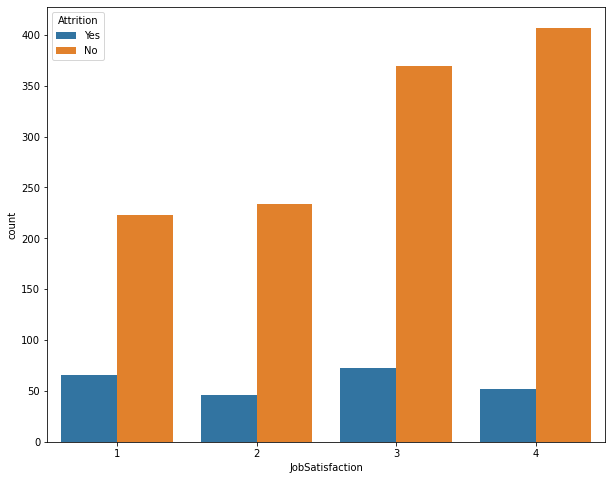

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='JobSatisfaction',hue='Attrition')

JobSatisfaction IS ALSO A NECESSARY PART FOR EMPLOYEE TO STAY IN COMPANY

HE/SHE IF SATISFIED WITH THE JOB WOULD DO A GOOD JOB AND NOT LEAVE THE COMPANY AND SO CAN WE SEE IN THE ABOVE GRAPH

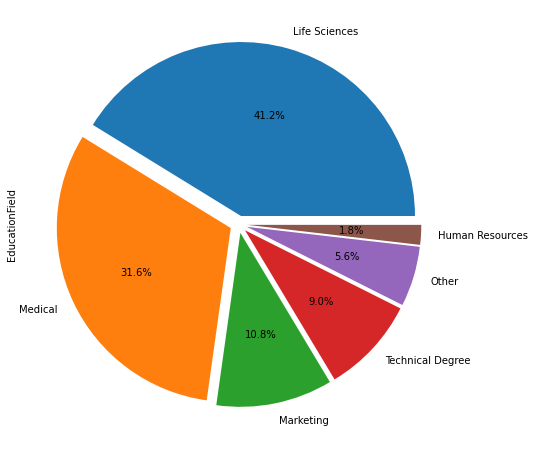

In [27]:
plt.figure(figsize=(10,8))
df.EducationField.value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

There are more people with a Life sciences followed by medical and marketing

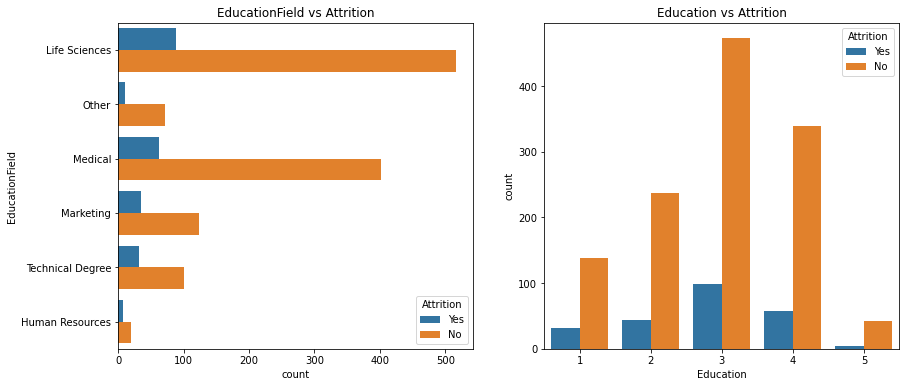

In [28]:
fig, ax = plt.subplots(ncols= 2, figsize = (14,6))   


sns.countplot(data=df, y = "EducationField", hue="Attrition",ax=ax[0])
ax[0].set_title("EducationField vs Attrition")



ax[1].set_title("Education vs Attrition")
sns.countplot(data=df, x = "Education", hue="Attrition",ax=ax[1])
plt.show()

Employee's in the EducationField of Life sciences and medical have highest attrition levels.

When compared with Education level, we have observed that employees in the highest level of education in there field of study have left the company. We can conclude that EducationField is a strong indicator of attrition.

educaion level 3 are having more tendency to yes attrtion and is low with level 5


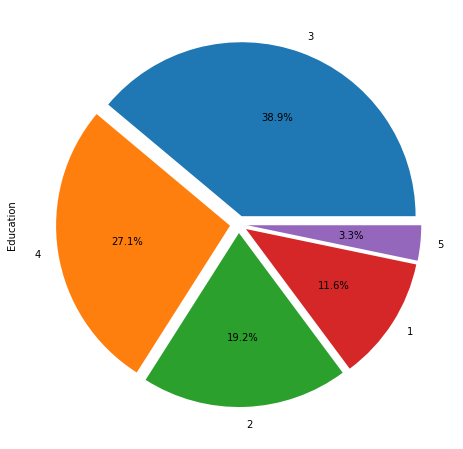

In [29]:
plt.figure(figsize=(10,8))
df.Education.value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%',shadow=False);

EDUCATION LEVEL 3 ARE HIGHER IN NUMBERS followed by LEVEL 4 AND 3

In [30]:
#ID OF EMPLYEE FROM EACH DEPT. HAVING LEAST SALARY
df[['EmployeeNumber',
      'Department',
      'MonthlyRate','Attrition']].groupby(['Department']).agg('min')

,EmployeeNumber,MonthlyRate,Attrition
Department,,,
Human Resources,103,2097,No
Research & Development,2,2094,No
Sales,1,2137,No


In [31]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [32]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [33]:
x = df[(df['BusinessTravel'] == 'Travel_Frequently') & 
    (df['Department'] == 'Sales') &
    (df['MonthlyRate'] > 5000)][['EmployeeNumber',
                                  'Department',
                                  'MonthlyRate']].sort_values(by = 'MonthlyRate',
                                                              ascending = False)
x.head(20)


,EmployeeNumber,Department,MonthlyRate
1438,2023,Sales,26956
1319,1853,Sales,26075
347,467,Sales,25751
866,1212,Sales,25440
70,91,Sales,24668
1223,1716,Sales,24164
576,800,Sales,24008
533,729,Sales,23772
548,754,Sales,23683
760,1050,Sales,23537


In [34]:
# find the avg salary
avg_sal = df['MonthlyRate'].mean()

df[(df['TotalWorkingYears'] > 10) &
    (df['MonthlyRate'] < avg_sal)][['EmployeeNumber',
                                      'MonthlyRate',
                                     'Department','Attrition']].sort_values(by = 'MonthlyRate',
                                                                ascending = False).head(20)

,EmployeeNumber,MonthlyRate,Department,Attrition
1452,2044,14255,Sales,Yes
1277,1789,14218,Research & Development,No
90,119,14115,Research & Development,No
1333,1869,14011,Sales,Yes
139,184,13982,Human Resources,No
988,1392,13953,Research & Development,No
728,1013,13943,Research & Development,No
175,241,13939,Research & Development,No
701,981,13938,Sales,No
511,699,13934,Research & Development,No


#### ALL THE EMPLOYEE WHO HAVE 10 YRS OF EXPERIENCE BUT STILL GET LESS THAN AVERAGE SALARY IN THE ORGANIZATION

SALES CATEGORY GETTING SALARY BELOW AVG TEND TO LEAVE JOB

In [35]:
df[(df['YearsInCurrentRole'] > 5)][['EmployeeNumber',
                                        'MonthlyRate']].sort_values(by = 'MonthlyRate').head(10)

,EmployeeNumber,MonthlyRate
28,36,2094
459,616,2112
473,638,2125
1370,1934,2125
178,244,2137
968,1362,2261
927,1294,2323
789,1098,2326
881,1235,2338
63,81,2354


EMPLOYEE GETTING LESS SALARY AND ARE WORKING FROM 5 YEARS

# CORRELATIION

In [36]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


<AxesSubplot:>

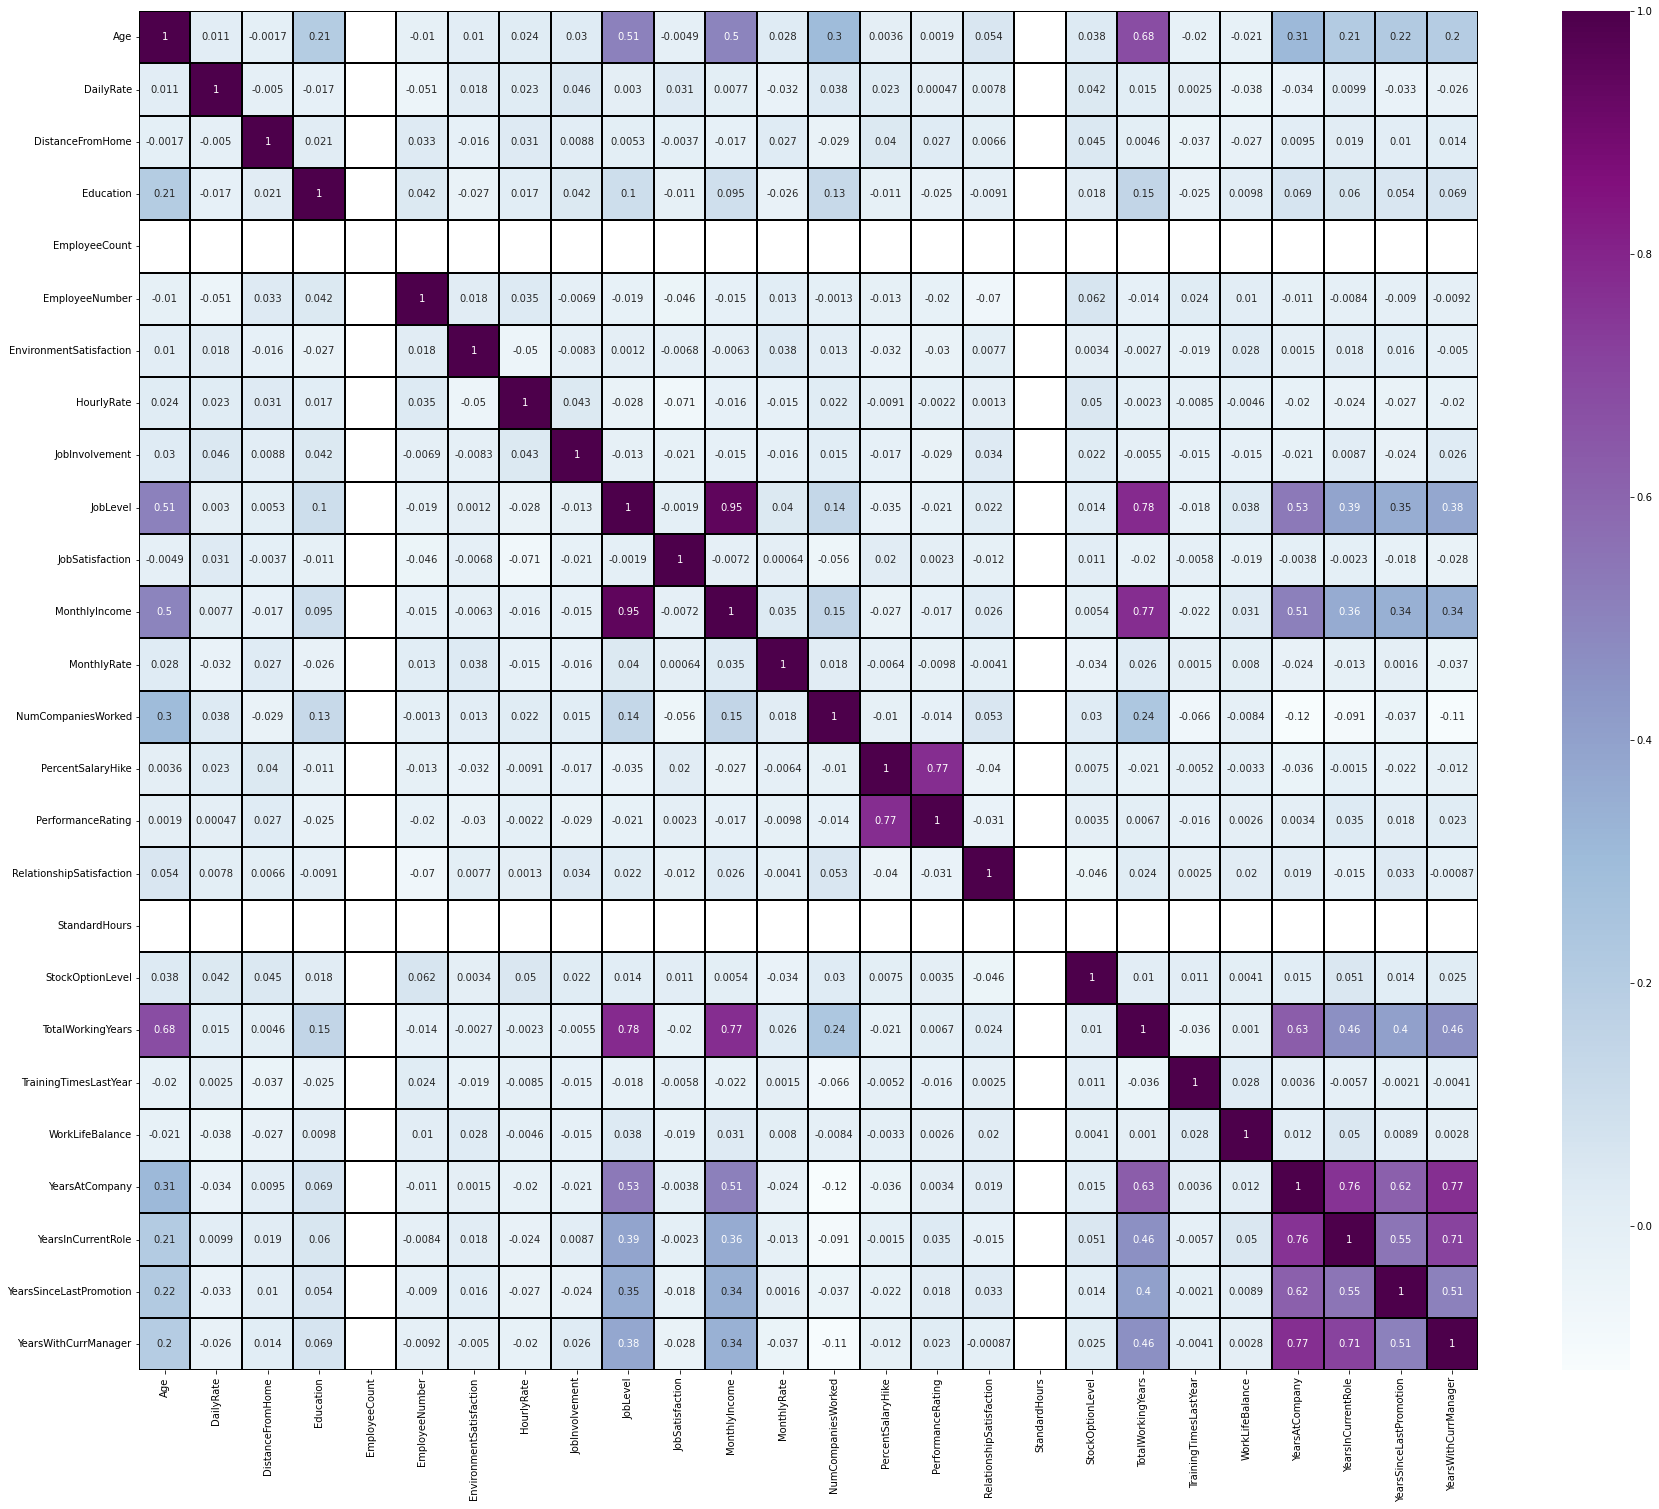

In [37]:
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),annot=True,linewidths=0.2,linecolor='black',cmap='BuPu')

1)performance rating and percentage salary hike are highly correlated

2)yearsatcurrentrole, yearsatcompany, yearssincelastpromotion and yearswithcurrmanager are correlated with each other.


In [38]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [39]:
df['StandardHours'].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [40]:
# lets drop some useless columns

df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],inplace=True,axis=1)
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [41]:
# lets check the column which are categorical in nature or are strings
df.select_dtypes('object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [42]:
#Now lets assign a labels to our quality variable

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [43]:
df['Attrition'] = LE.fit_transform(df['Attrition'])
df['BusinessTravel'] = LE.fit_transform(df['BusinessTravel'])
df['Department'] = LE.fit_transform(df['Department'])
df['EducationField'] = LE.fit_transform(df['EducationField'])
df['Gender'] = LE.fit_transform(df['Gender'])
df['JobRole'] = LE.fit_transform(df['JobRole'])
df['MaritalStatus'] = LE.fit_transform(df['MaritalStatus'])
df['OverTime'] = LE.fit_transform(df['OverTime'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


# Checking outliers

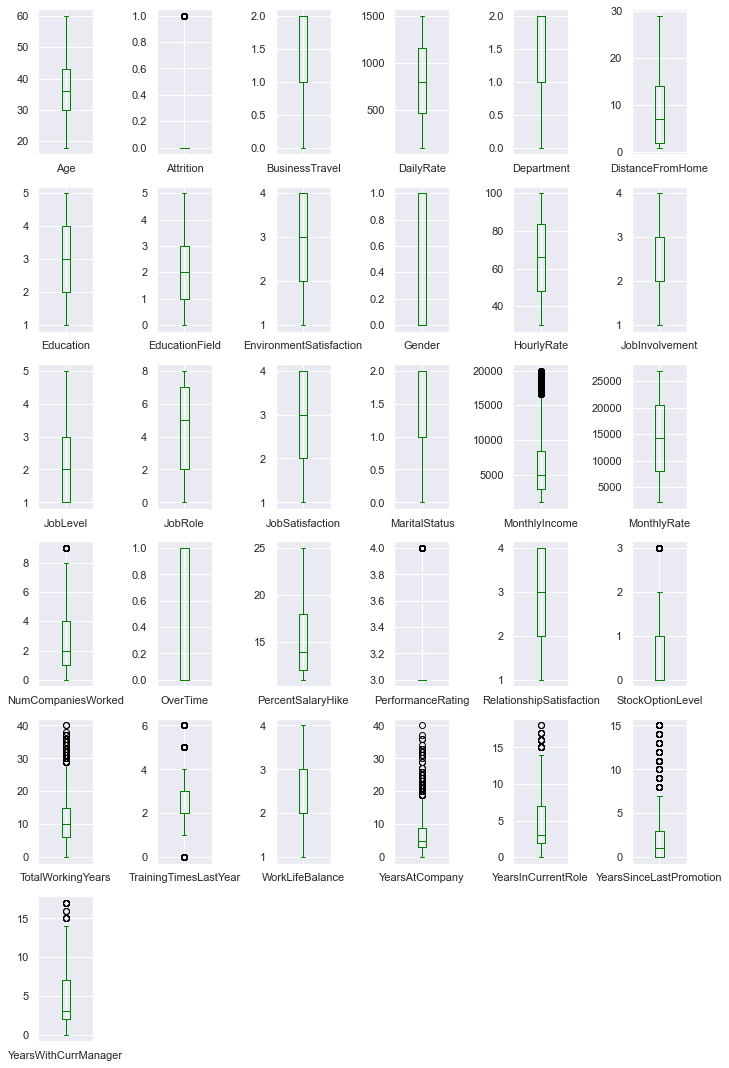

In [44]:
sns.set(style="darkgrid")
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(10,15),color = 'green')
plt.tight_layout()

OUTLIERS PRESENT IN SOME COLUMNS

## REMOVING THEM BY ZSCORE

In [45]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,2.280906,0.590048,0.742527,1.401512,1.010909,0.891688,0.937414,0.660531,1.224745,...,0.426230,1.584178,0.932014,0.421642,2.171982,2.493820,0.164613,0.063296,0.679146,0.245834
1,1.322365,0.438422,0.913194,1.297775,0.493817,0.147150,1.868426,0.937414,0.254625,0.816497,...,2.346151,1.191438,0.241988,0.164511,0.155707,0.338096,0.488508,0.764998,0.368715,0.806541
2,0.008343,2.280906,0.590048,1.414363,0.493817,0.887515,0.891688,1.316673,1.169781,0.816497,...,0.426230,0.658973,0.932014,0.550208,0.155707,0.338096,1.144294,1.167687,0.679146,1.155935
3,0.429664,0.438422,0.913194,1.461466,0.493817,0.764121,1.061787,0.937414,1.169781,1.224745,...,0.426230,0.266233,0.932014,0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,1.155935
4,1.086676,0.438422,0.590048,0.524295,0.493817,0.887515,1.868426,0.565311,1.575686,0.816497,...,0.426230,1.191438,0.241988,0.678774,0.155707,0.338096,0.817734,0.615492,0.058285,0.595227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.101159,0.438422,0.913194,0.202082,0.493817,1.703764,0.891688,0.565311,0.254625,0.816497,...,0.426230,0.266233,0.241988,0.735447,0.155707,0.338096,0.327893,0.615492,0.679146,0.314873
1466,0.227347,0.438422,0.590048,0.469754,0.493817,0.393938,1.868426,0.565311,1.169781,0.816497,...,0.426230,1.584178,0.241988,0.293077,1.707500,0.338096,0.001333,0.764998,0.368715,0.806541
1467,1.086676,0.438422,0.590048,1.605183,0.493817,0.640727,0.085049,0.937414,0.660531,0.816497,...,2.346151,0.658973,0.241988,0.678774,2.171982,0.338096,0.164613,0.615492,0.679146,0.314873
1468,1.322365,0.438422,0.913194,0.546677,1.401512,0.887515,0.085049,0.565311,1.169781,0.816497,...,0.426230,1.191438,0.932014,0.735447,0.155707,1.077862,0.325228,0.488900,0.679146,1.086895


In [46]:
threshold=3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430]), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 27, 30, 29, 28, 28,

In [47]:
df1=df[(z<3).all(axis=1)]
df1


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


# Data Preprocessing

In [48]:

# splittig the target variables
y = df['Attrition']
x = df.drop(['Attrition'], axis = 1)

# lets check teh shape of the new var
print("Shape of x :", x.shape)
print("Shape of y :", y.shape)

Shape of x : (1470, 30)
Shape of y : (1470,)


# Checking skewness

In [49]:
df1.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

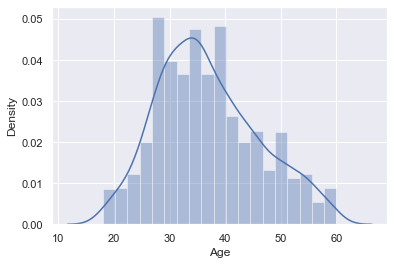

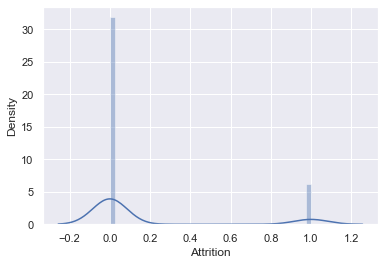

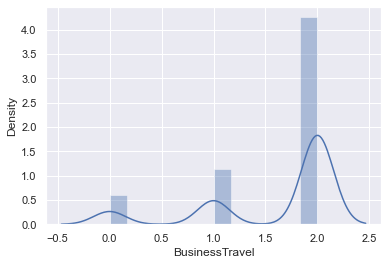

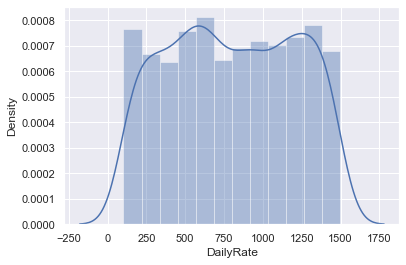

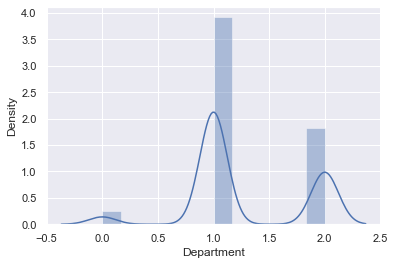

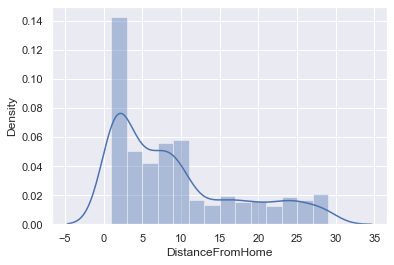

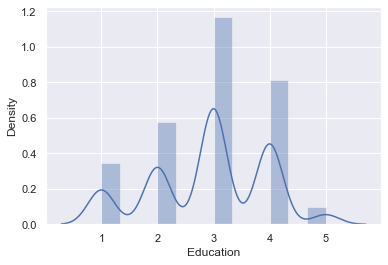

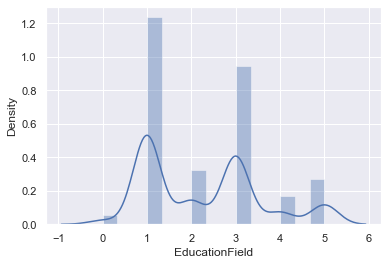

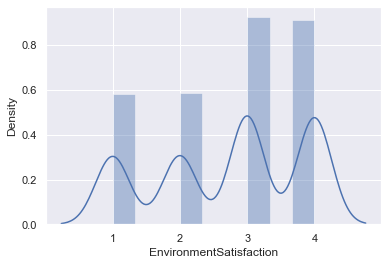

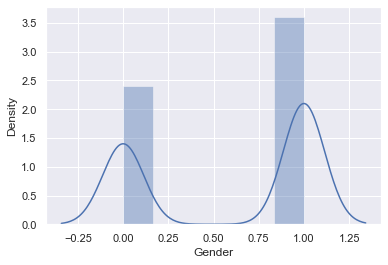

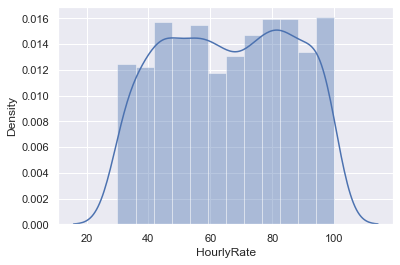

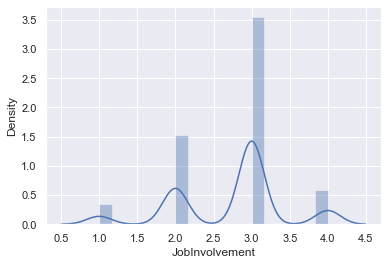

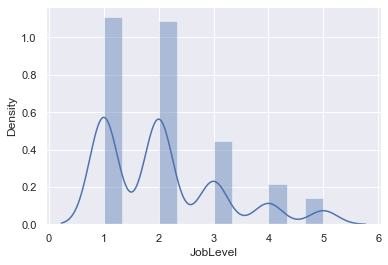

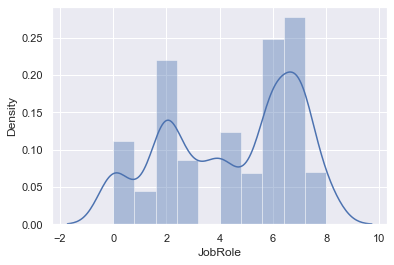

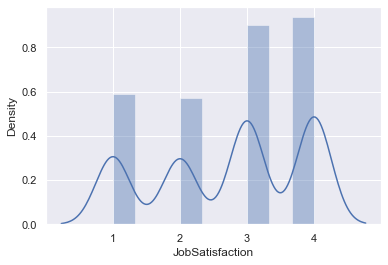

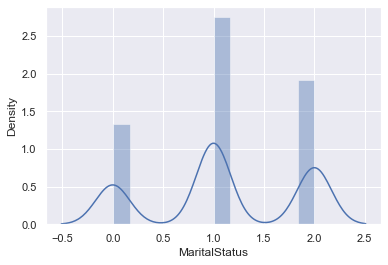

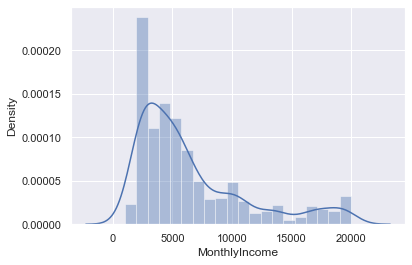

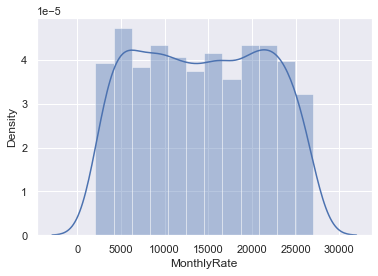

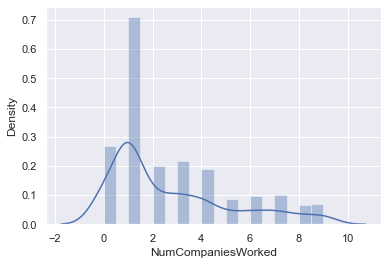

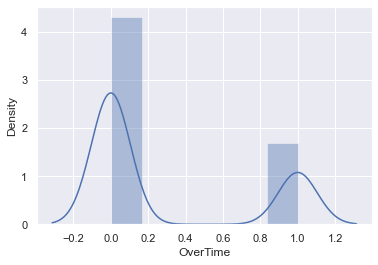

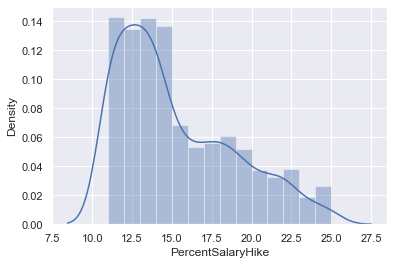

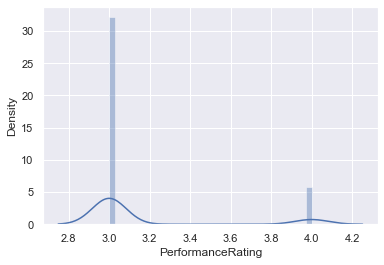

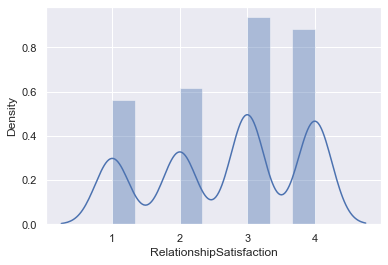

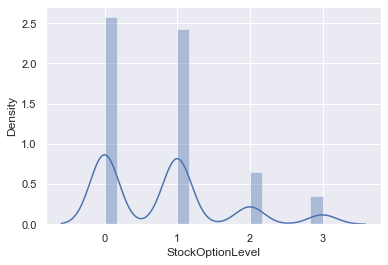

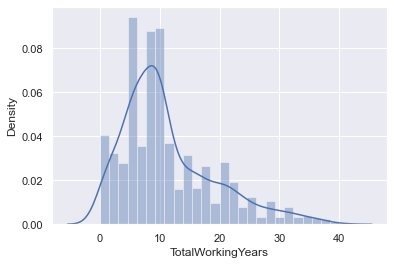

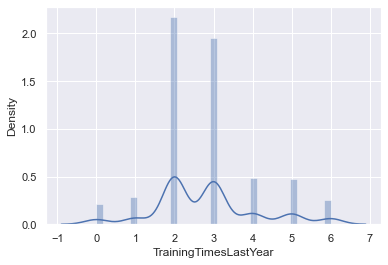

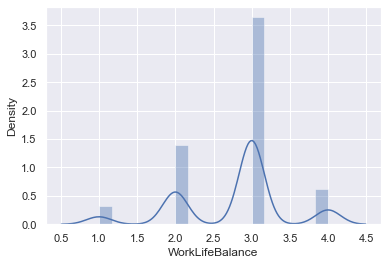

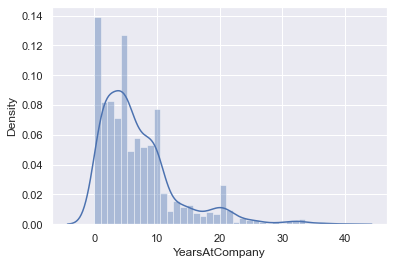

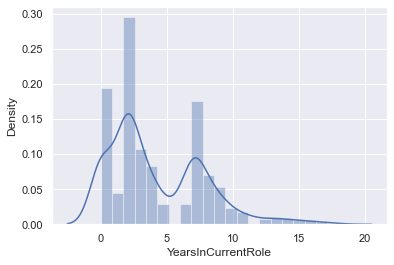

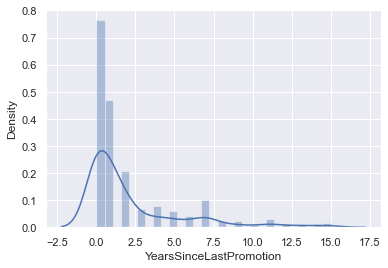

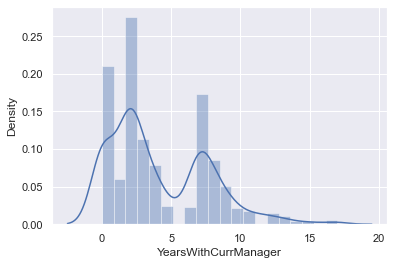

In [50]:


column=['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

for i in column:
    sns.distplot(df[i])
    plt.show()



SKEWNESS PRESENT IS SOME COLUMNS

### REMOVING IT WITH POWER TRANSFORM

In [51]:
from sklearn.preprocessing import power_transform

df1=power_transform(x,method='yeo-johnson')
df1

array([[ 0.52213976,  0.63546836,  0.7592893 , ...,  0.2055623 ,
        -1.09486169,  0.49014719],
       [ 1.27641097, -1.39286498, -1.33459724, ...,  0.883888  ,
         0.09685415,  0.90963491],
       [ 0.10209148,  0.63546836,  1.34036452, ..., -1.59643394,
        -1.09486169, -1.55015588],
       ...,
       [-1.12375507,  0.63546836, -1.75171312, ..., -0.44664507,
        -1.09486169, -0.05300033],
       [ 1.27641097, -1.39286498,  0.58323545, ...,  0.68299511,
        -1.09486169,  1.09011007],
       [-0.23618832,  0.63546836, -0.35884464, ..., -0.08961473,
         0.09685415, -0.40688122]])

### SCALLING

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.4463504 ,  0.59004834,  0.74252653, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -0.91319439, -1.2977746 , ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  0.59004834,  1.41436324, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552,  0.59004834, -1.60518328, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521, -0.91319439,  0.54667746, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256,  0.59004834, -0.43256792, ..., -0.33939374,
        -0.36871529, -0.59522723]])

# MODEL BUILDING

In [53]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=123)


In [54]:
#1 MODEL

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix


lo=LogisticRegression()
lo.fit(x_train,y_train)
lo.score(x_train,y_train)
predlo=lo.predict(x_test)



print('Accuracy Score is',accuracy_score(y_test,predlo))
print('Confusion Matrix''\n',confusion_matrix(y_test,predlo))
print(classification_report(y_test,predlo))

Accuracy Score is 0.9104938271604939
Confusion Matrix
 [[278   6]
 [ 23  17]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       284
           1       0.74      0.42      0.54        40

    accuracy                           0.91       324
   macro avg       0.83      0.70      0.75       324
weighted avg       0.90      0.91      0.90       324



In [55]:
#2 MODEL

from sklearn.tree import DecisionTreeClassifier



dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddtc=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,preddtc))
print('Confusion Matrix''\n',confusion_matrix(y_test,preddtc))
print('Classification Report''\n',classification_report(y_test,preddtc))

Accuracy score
 0.8302469135802469
Confusion Matrix
 [[253  31]
 [ 24  16]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       284
           1       0.34      0.40      0.37        40

    accuracy                           0.83       324
   macro avg       0.63      0.65      0.63       324
weighted avg       0.84      0.83      0.84       324



In [56]:
#model 3

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=dt.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predrfc))
print('Confusion Matrix''\n',confusion_matrix(y_test,predrfc))
print('Classification Report''\n',classification_report(y_test,predrfc))

Accuracy score
 0.8302469135802469
Confusion Matrix
 [[253  31]
 [ 24  16]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       284
           1       0.34      0.40      0.37        40

    accuracy                           0.83       324
   macro avg       0.63      0.65      0.63       324
weighted avg       0.84      0.83      0.84       324



In [57]:
#MODEL 4

from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,predsvc))
print('Confusion Matrix''\n',confusion_matrix(y_test,predsvc))
print('Classification Report''\n',classification_report(y_test,predsvc))

Accuracy score
 0.8919753086419753
Confusion Matrix
 [[282   2]
 [ 33   7]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       284
           1       0.78      0.17      0.29        40

    accuracy                           0.89       324
   macro avg       0.84      0.58      0.61       324
weighted avg       0.88      0.89      0.86       324



In [58]:
#MODEL 5 Gradient Boosting Classifier


from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
predgbk = gbk.predict(x_test)
print('Accuracy score''\n',accuracy_score(predgbk,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,predgbk))
print('Classification Report''\n',classification_report(y_test,predgbk))

Accuracy score
 0.9074074074074074
Confusion Matrix
 [[279   5]
 [ 25  15]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       284
           1       0.75      0.38      0.50        40

    accuracy                           0.91       324
   macro avg       0.83      0.68      0.72       324
weighted avg       0.90      0.91      0.89       324



In [59]:
#MODEL 6

from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn= knn.predict(x_test)
print('Accuracy score''\n',accuracy_score(predknn,y_test))
print('Confusion Matrix''\n',confusion_matrix(y_test,predknn))
print('Classification Report''\n',classification_report(y_test,predknn))

Accuracy score
 0.8827160493827161
Confusion Matrix
 [[279   5]
 [ 33   7]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.98      0.94       284
           1       0.58      0.17      0.27        40

    accuracy                           0.88       324
   macro avg       0.74      0.58      0.60       324
weighted avg       0.86      0.88      0.85       324



In [60]:
#MODEL 7

from sklearn.ensemble import ExtraTreesClassifier


ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)
print('Accuracy score''\n',accuracy_score(y_test,pred_ETC))
print('Confusion Matrix''\n',confusion_matrix(y_test,pred_ETC))
print('Classification Report''\n',classification_report(y_test,pred_ETC))


Accuracy score
 0.9074074074074074
Confusion Matrix
 [[284   0]
 [ 30  10]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       284
           1       1.00      0.25      0.40        40

    accuracy                           0.91       324
   macro avg       0.95      0.62      0.67       324
weighted avg       0.92      0.91      0.88       324



# Cross Validation


In [61]:
# Logistic REGRESSION


test_accuracy= accuracy_score(y_test,predlo)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lo,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 86.39455782312926 and Accuracy score is 91.0493827160494
At cross fold 3 the Cross Val score is 86.66666666666667 and Accuracy score is 91.0493827160494
At cross fold 4 the Cross Val score is 86.39323687951665 and Accuracy score is 91.0493827160494
At cross fold 5 the Cross Val score is 86.5986394557823 and Accuracy score is 91.0493827160494
At cross fold 6 the Cross Val score is 86.53061224489797 and Accuracy score is 91.0493827160494
At cross fold 7 the Cross Val score is 86.80272108843538 and Accuracy score is 91.0493827160494
At cross fold 8 the Cross Val score is 86.6665924210026 and Accuracy score is 91.0493827160494
At cross fold 9 the Cross Val score is 86.324754351838 and Accuracy score is 91.0493827160494


In [62]:
# DecisionTreeClassifier 


test_accuracy= accuracy_score(y_test,preddtc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(dt,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 77.55102040816327 and Accuracy score is 83.0246913580247
At cross fold 3 the Cross Val score is 80.47619047619047 and Accuracy score is 83.0246913580247
At cross fold 4 the Cross Val score is 77.00935167634167 and Accuracy score is 83.0246913580247
At cross fold 5 the Cross Val score is 78.63945578231292 and Accuracy score is 83.0246913580247
At cross fold 6 the Cross Val score is 79.38775510204081 and Accuracy score is 83.0246913580247
At cross fold 7 the Cross Val score is 78.02721088435372 and Accuracy score is 83.0246913580247
At cross fold 8 the Cross Val score is 78.02736695177002 and Accuracy score is 83.0246913580247
At cross fold 9 the Cross Val score is 77.28107802550419 and Accuracy score is 83.0246913580247


In [63]:
# RANDOM FOREST CLASSIFIER

test_accuracy= accuracy_score(y_test,predrfc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(rfc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 85.23809523809524 and Accuracy score is 83.0246913580247
At cross fold 3 the Cross Val score is 85.51020408163265 and Accuracy score is 83.0246913580247
At cross fold 4 the Cross Val score is 85.37403003198673 and Accuracy score is 83.0246913580247
At cross fold 5 the Cross Val score is 85.98639455782312 and Accuracy score is 83.0246913580247
At cross fold 6 the Cross Val score is 85.85034013605441 and Accuracy score is 83.0246913580247
At cross fold 7 the Cross Val score is 85.71428571428571 and Accuracy score is 83.0246913580247
At cross fold 8 the Cross Val score is 85.71439177952007 and Accuracy score is 83.0246913580247
At cross fold 9 the Cross Val score is 85.2394965667448 and Accuracy score is 83.0246913580247


In [64]:
# SUPPORT VECTOR CLASSIFIER

test_accuracy= accuracy_score(y_test,predsvc)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(svc,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 85.578231292517 and Accuracy score is 89.19753086419753
At cross fold 3 the Cross Val score is 86.39455782312925 and Accuracy score is 89.19753086419753
At cross fold 4 the Cross Val score is 85.98673883426133 and Accuracy score is 89.19753086419753
At cross fold 5 the Cross Val score is 86.3265306122449 and Accuracy score is 89.19753086419753
At cross fold 6 the Cross Val score is 85.85034013605441 and Accuracy score is 89.19753086419753
At cross fold 7 the Cross Val score is 85.91836734693878 and Accuracy score is 89.19753086419753
At cross fold 8 the Cross Val score is 85.98798705155619 and Accuracy score is 89.19753086419753
At cross fold 9 the Cross Val score is 85.71541390260529 and Accuracy score is 89.19753086419753


In [65]:
#GRADIENT BOOSTING CLASSIFIER

test_accuracy= accuracy_score(y_test,predgbk)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(gbk,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 84.89795918367346 and Accuracy score is 90.74074074074075
At cross fold 3 the Cross Val score is 87.00680272108843 and Accuracy score is 90.74074074074075
At cross fold 4 the Cross Val score is 86.39397731311456 and Accuracy score is 90.74074074074075
At cross fold 5 the Cross Val score is 86.05442176870748 and Accuracy score is 90.74074074074075
At cross fold 6 the Cross Val score is 87.07482993197279 and Accuracy score is 90.74074074074075
At cross fold 7 the Cross Val score is 86.73469387755102 and Accuracy score is 90.74074074074075
At cross fold 8 the Cross Val score is 86.66919101924448 and Accuracy score is 90.74074074074075
At cross fold 9 the Cross Val score is 86.32724824180758 and Accuracy score is 90.74074074074075


In [66]:
#KN CLASSIFIER

test_accuracy= accuracy_score(y_test,predknn)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(knn,x,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 84.35374149659864 and Accuracy score is 88.27160493827161
At cross fold 3 the Cross Val score is 85.3061224489796 and Accuracy score is 88.27160493827161
At cross fold 4 the Cross Val score is 85.44233503139439 and Accuracy score is 88.27160493827161
At cross fold 5 the Cross Val score is 85.03401360544217 and Accuracy score is 88.27160493827161
At cross fold 6 the Cross Val score is 84.5578231292517 and Accuracy score is 88.27160493827161
At cross fold 7 the Cross Val score is 84.21768707482993 and Accuracy score is 88.27160493827161
At cross fold 8 the Cross Val score is 84.69425635542885 and Accuracy score is 88.27160493827161
At cross fold 9 the Cross Val score is 84.89741799258483 and Accuracy score is 88.27160493827161


In [67]:
# EXTRA TRESS CLASSIFIER

test_accuracy= accuracy_score(y_test,pred_ETC)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(ETC,x,y,cv=i,n_jobs=2)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 85.78231292517006 and Accuracy score is 90.74074074074075
At cross fold 3 the Cross Val score is 85.64625850340136 and Accuracy score is 90.74074074074075
At cross fold 4 the Cross Val score is 86.05411829167161 and Accuracy score is 90.74074074074075
At cross fold 5 the Cross Val score is 85.85034013605443 and Accuracy score is 90.74074074074075
At cross fold 6 the Cross Val score is 85.98639455782315 and Accuracy score is 90.74074074074075
At cross fold 7 the Cross Val score is 85.64625850340136 and Accuracy score is 90.74074074074075
At cross fold 8 the Cross Val score is 85.91856735566643 and Accuracy score is 90.74074074074075
At cross fold 9 the Cross Val score is 85.64724757677024 and Accuracy score is 90.74074074074075


# ALL MODEL ARE PERFORMING BETTER OUT WHICH GRADIENT BOOSTING CLASSIFIER IS PERFORMING BETTER

**difference between accuracy score and cv score is low for GRADIENT BOOSTING CLASSIFIER**

# HYPERPARAMETER TUNING

In [68]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10],
           'criterion':['gini','entropy']}

gcv=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt'}

In [69]:
gcv_pred=gcv.best_estimator_.predict(x_test)#predicting with best parameters
print('Accuracy score''\n',accuracy_score(y_test,gcv_pred))#checking the final score

print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred))
print('Classification Report''\n',classification_report(y_test,gcv_pred))

Accuracy score
 0.9074074074074074
Confusion Matrix
 [[284   0]
 [ 30  10]]
Classification Report
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       284
           1       1.00      0.25      0.40        40

    accuracy                           0.91       324
   macro avg       0.95      0.62      0.67       324
weighted avg       0.92      0.91      0.88       324



In [70]:
from sklearn.model_selection import GridSearchCV

#creating the parameter list to pass in GrideSearchcv
parameters1={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9,10], "max_leaf_nodes": [2, 5, 10]}

gcv1=GridSearchCV(GradientBoostingClassifier(),parameters1,cv=6,scoring="accuracy")
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 5}

In [71]:
gcv_pred1=gcv1.best_estimator_.predict(x_test)#predicting with best parameters
print('Accuracy score''\n',accuracy_score(y_test,gcv_pred1))#checking the final score
print('Confusion Matrix''\n',confusion_matrix(y_test,gcv_pred1))
print('Classification Report''\n',classification_report(y_test,gcv_pred1))

Accuracy score
 0.904320987654321
Confusion Matrix
 [[282   2]
 [ 29  11]]
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       284
           1       0.85      0.28      0.42        40

    accuracy                           0.90       324
   macro avg       0.88      0.63      0.68       324
weighted avg       0.90      0.90      0.88       324



#### FINALLY RANDOM FOREST IS THE BEST MODEL AS ITS FALSE POSITIVE AND FALSE NEGATIVE ARE LOW 


# Final Prediction Submission

In [72]:
import numpy as np
a = np.array(y_test)
predicted = np.array(gcv.best_estimator_.predict(x_test))
df = pd.DataFrame(zip(a,predicted), columns = ["Original","Predicted"])
df

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
319,0,0
320,1,1
321,0,0
322,0,0


# ROC AUC plot

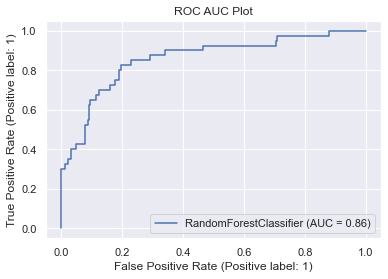

In [73]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

###### ACCURACY SCORE IS 90.45 AND AUC = 85

# Saving the model in pickle format

In [74]:
import pickle
# open a file, where you ant to store the data
file = open('HR_ATTRITION.pkl', 'wb')

# dump information to that file
pickle.dump(gcv.best_estimator_, file)

In [75]:
model  = open('HR_ATTRITION.pkl','rb')
forest = pickle.load(model)